### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from joblib import load

import matplotlib.pyplot as plt
import seaborn as sns

### Interpret best model

In [2]:
# results dir for loading/saving
results_dir = pathlib.Path("results/")

log_reg_model_path = pathlib.Path(f"{results_dir}/1.log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Compile Coefficients Matrix

In [3]:
coefs = np.abs(log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 15)


,Apoptosis,Artefact,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,Polylobed,Prometaphase,SmallIrregular,UndefinedCondensed
0,0.013202,2.993157e-02,0.036234,0.000000,2.699189e-02,0.016791,0.019243,0.057183,0.01927,0.000000,0.028843,0.062786,0.026804,7.580189e-02,0.000000e+00
1,0.000000,6.648345e-08,0.053095,0.000000,6.027357e-02,0.000000,0.009521,0.085492,0.00000,0.000000,0.000000,0.078940,0.000000,2.981254e-02,0.000000e+00
2,0.024988,9.032520e-02,0.000116,0.000000,0.000000e+00,0.000000,0.001519,0.034242,0.00000,0.000000,0.033633,0.090287,0.036729,4.690197e-02,1.125281e-02
3,0.000000,1.794035e-02,0.072597,0.022768,9.665765e-08,0.006753,0.052173,0.163332,0.00000,0.021773,0.024582,0.057578,0.000000,3.040115e-07,1.355516e-06
4,0.057015,7.860546e-02,0.102148,0.000000,0.000000e+00,0.000000,0.030427,0.006265,0.00000,0.078376,0.000000,0.057607,0.004055,8.075157e-02,1.516480e-08


### Diagrams for interpreting coefficients

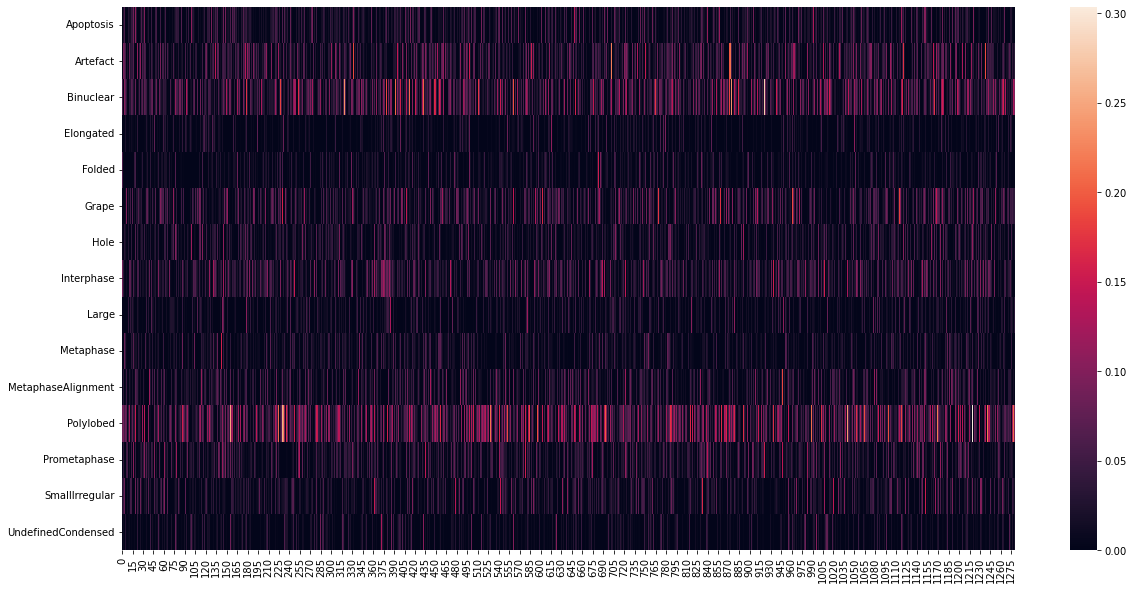

In [4]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/2.ML_phenotypic_classification/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


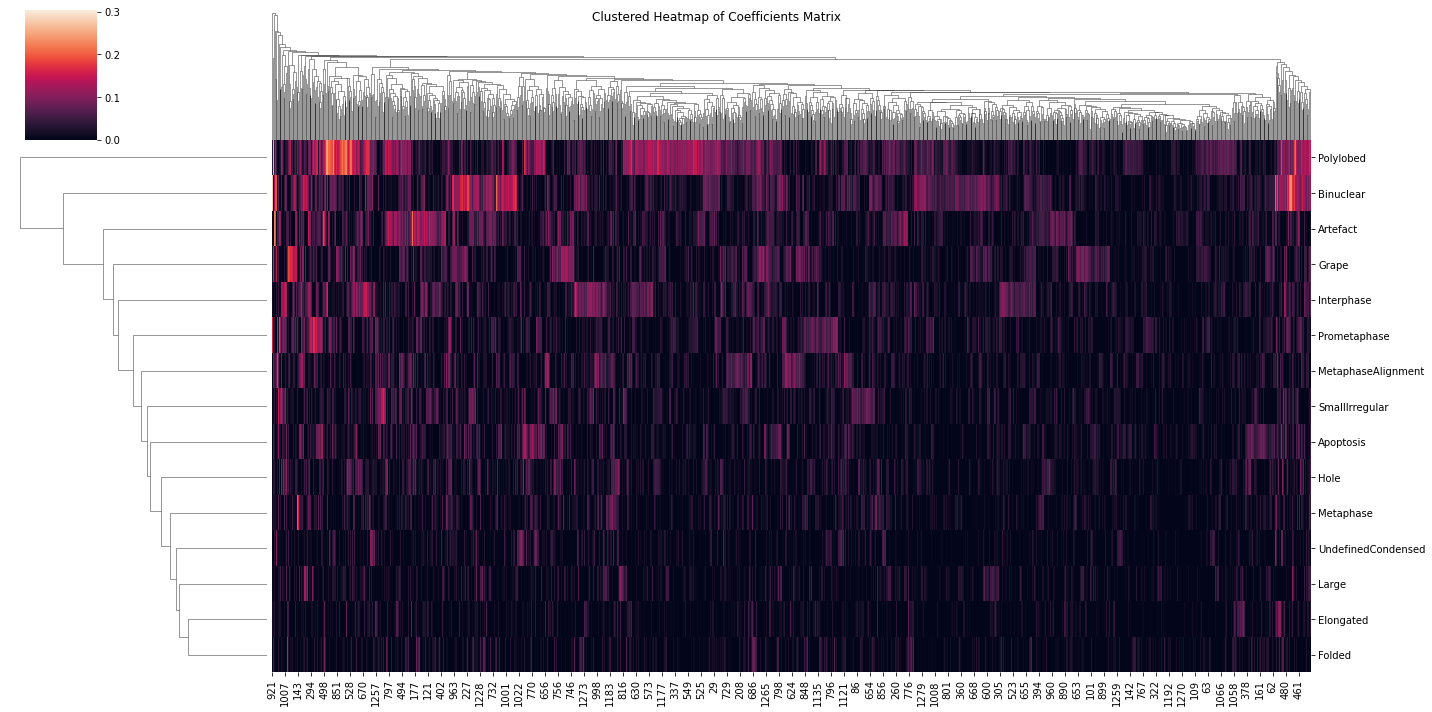

In [5]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

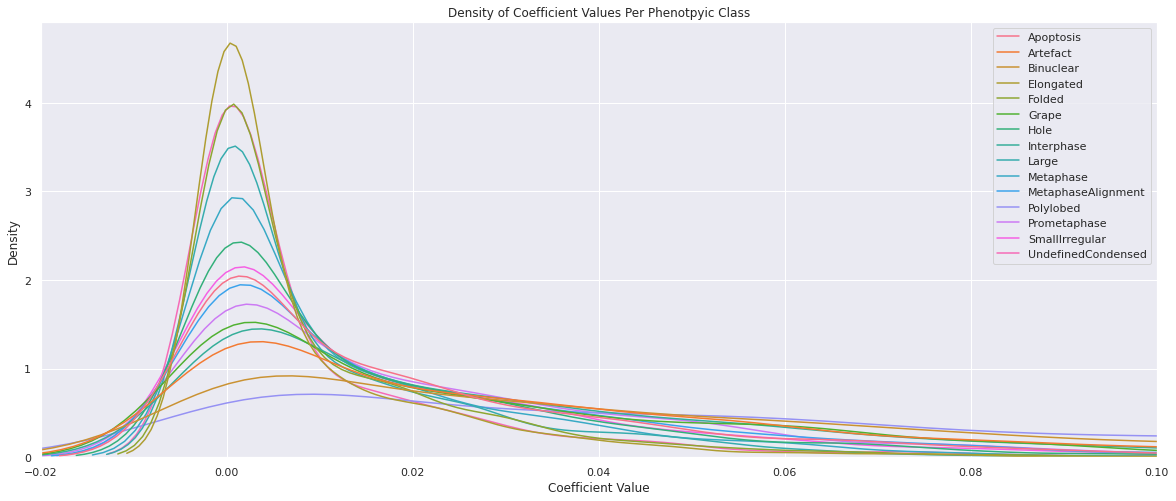

In [6]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

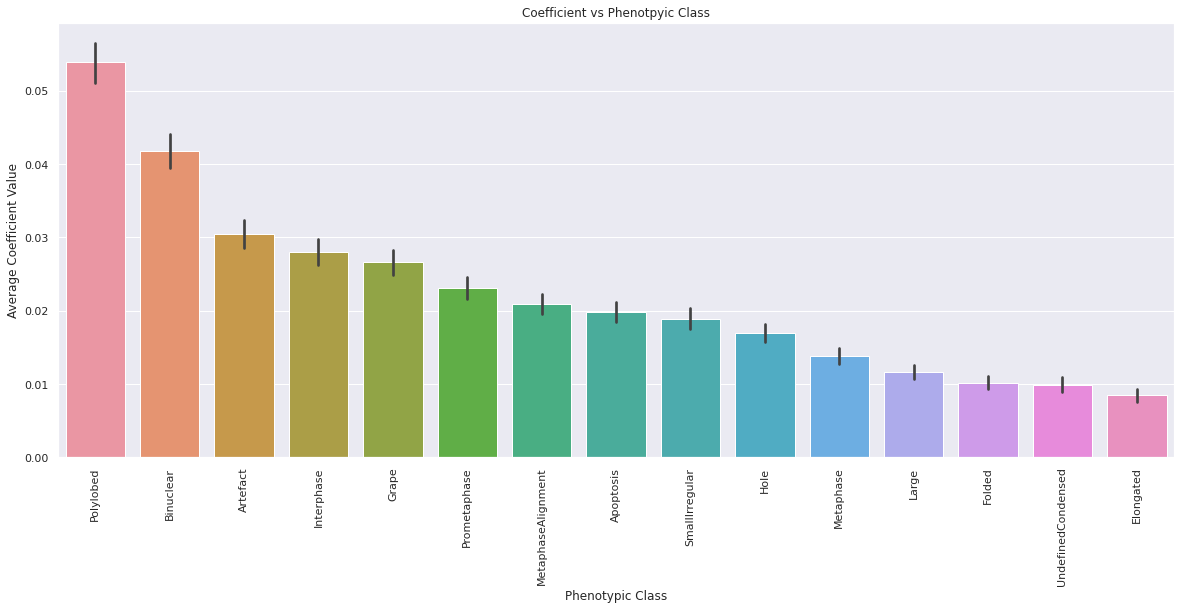

In [7]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

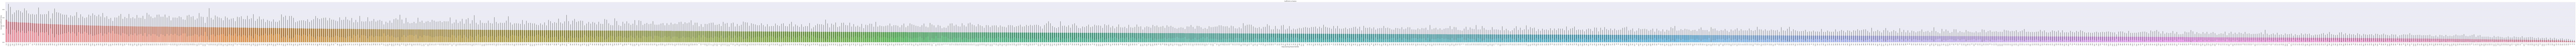

In [8]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)

### Interpret shuffled baseline model

In [9]:
# results dir for loading/saving
results_dir = pathlib.Path("results/")

shuffled_baseline_log_reg_model_path = pathlib.Path(f"{results_dir}/1.shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path)

### Compile Coefficients Matrix

In [10]:
coefs = np.abs(shuffled_baseline_log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = shuffled_baseline_log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 15)


,Apoptosis,Artefact,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,Polylobed,Prometaphase,SmallIrregular,UndefinedCondensed
0,1.300835e-01,0.124688,0.094601,0.038124,0.000000,0.082012,0.013520,0.270098,3.793212e-08,0.098405,0.079228,0.004639,0.025403,7.984894e-03,0.001548
1,9.558933e-08,0.041593,0.039018,0.010341,0.000000,0.004936,0.001517,0.058815,0.000000e+00,0.035298,0.077642,0.017563,0.035262,3.873087e-02,0.041493
2,4.221119e-03,0.057972,0.048180,0.026347,0.043415,0.231056,0.017170,0.056233,0.000000e+00,0.007129,0.029900,0.011663,0.011567,1.050725e-01,0.021808
3,4.316706e-07,0.009744,0.002220,0.022544,0.025497,0.000000,0.121213,0.062823,2.361056e-03,0.006850,0.037239,0.116112,0.068319,7.050959e-07,0.005797
4,7.930166e-07,0.000000,0.064978,0.045565,0.034474,0.091734,0.000000,0.105399,2.311574e-03,0.048407,0.022163,0.013941,0.050365,1.314798e-01,0.033351


### Diagrams for interpreting coefficients

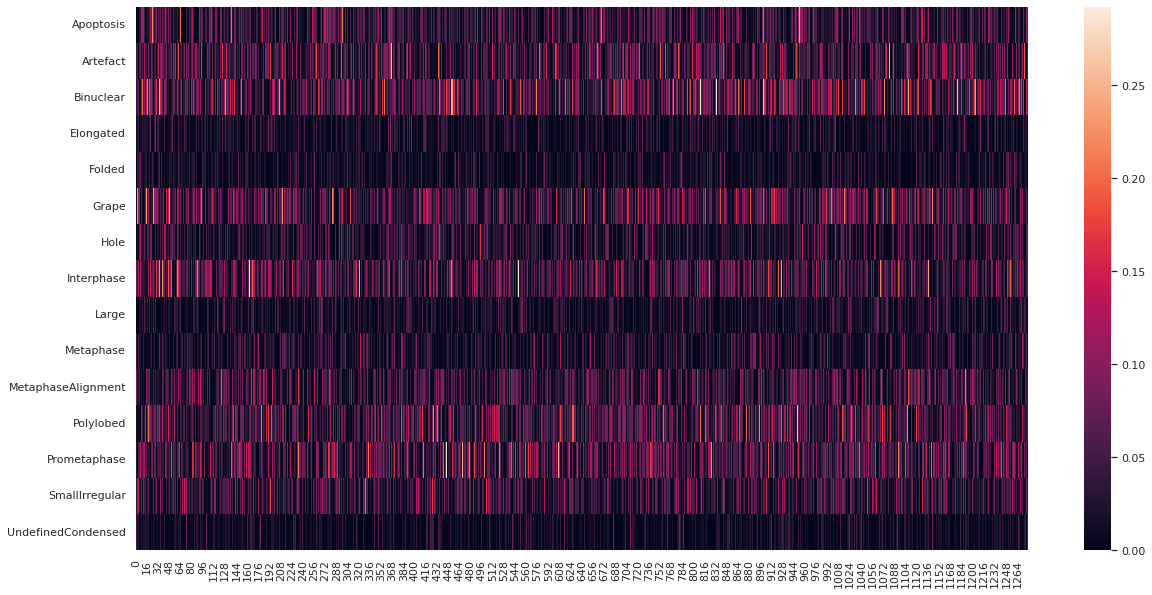

In [11]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/2.ML_phenotypic_classification/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


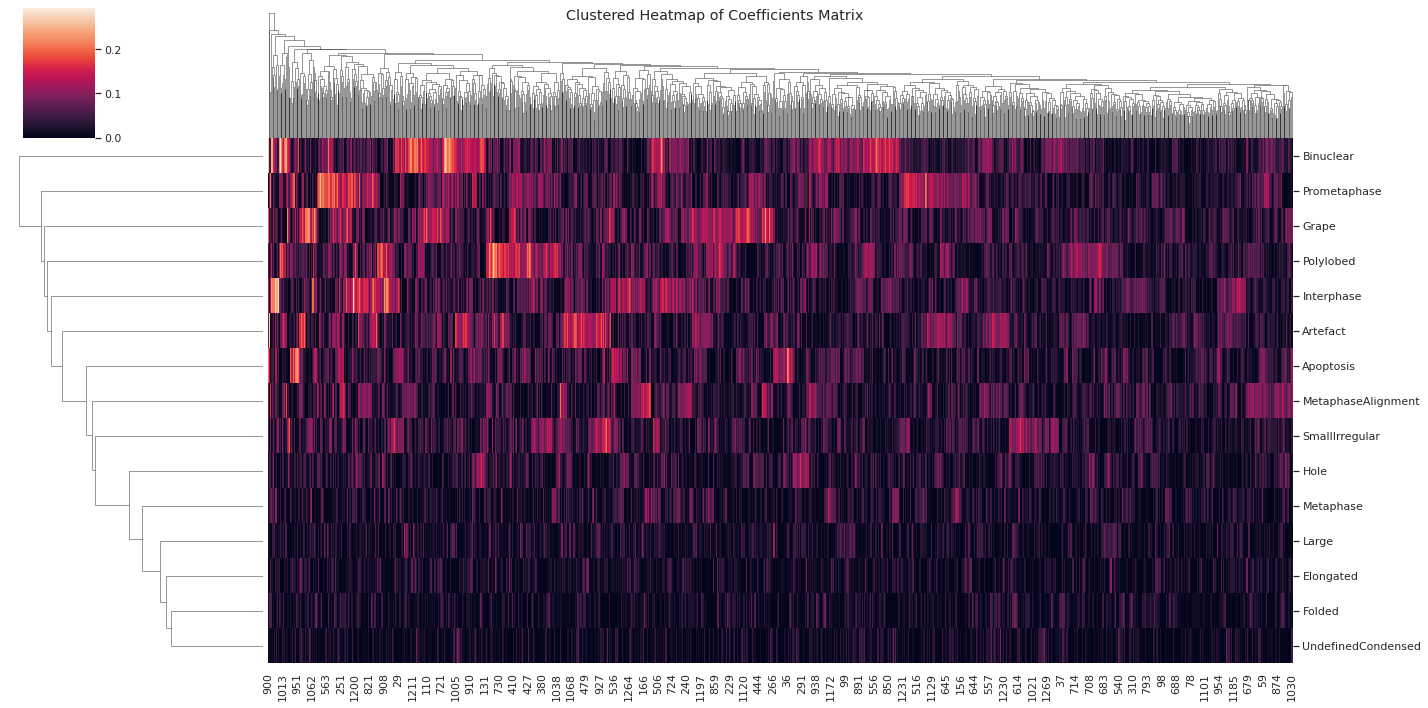

In [12]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

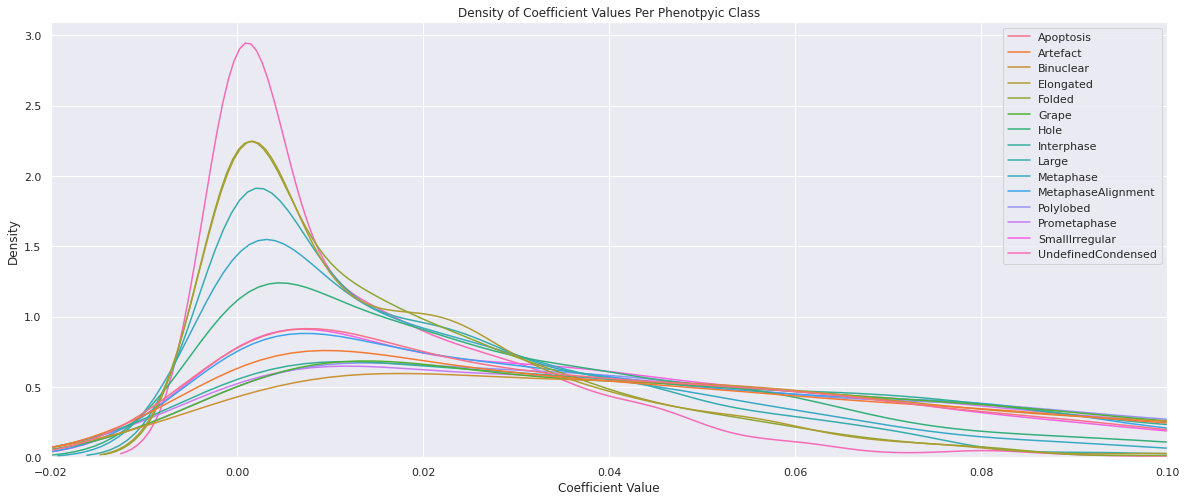

In [13]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

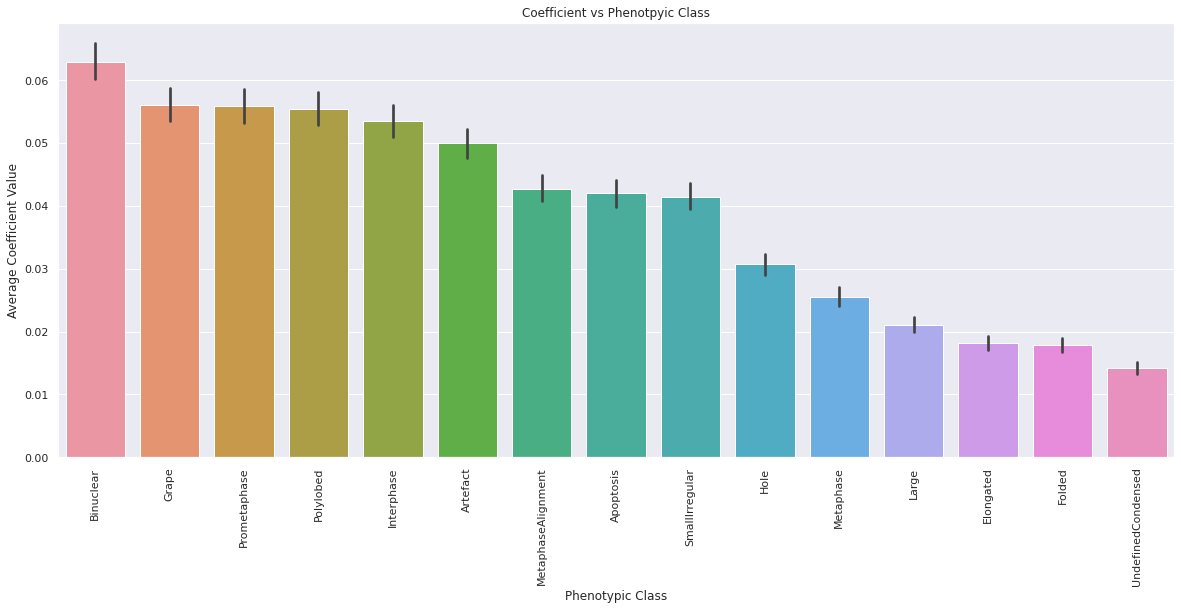

In [14]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

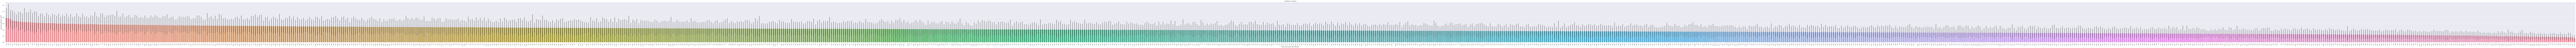

In [15]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)